 # Análisis de los hilos de cuentos de hadas publicados por @Bamtheory en Twitter
 
(por @SCHONGESAGT)

## Introducción:
 
En abril de 2020, Belén Ayala (@Bamtheory) comenzó a publicar en Twitter hilos con las historias originales de los cuentos clásicos y otras historias que han pasado a formar parte de la cultura pop vía adaptaciones cinematográficas o televisivas.
 
Estos hilos se hicieron particularmente virales, tanto por la calidad del contenido como por la forma narrativa adoptada por @Bamtheory, especialmente significativa para los venezolanos, ya que los tweets que forman los hilos están plagados de expresiones y referencias a la cultura pop del país.
 
Este notebook es un ejercicio de análisis de dichos hilos. No debe ser tomado como trabajo estadístico, ya que en principio está hecho como ejercicio práctico personal de data analysis con Python (y sus librerías Pandas, Numpy y Matplotlib) y Jupiter Notebook.
 
Tanto el notebook, como la data (en formato .csv) y el algoritmo implementado para extraerla serán publicados en mi github y se copiarán acá los respectivos enlaces.
 
Gracias,
Dan Almenar (@SCHONGESAGT)

 # Carga y muestra resumida de los datos recopilados:

 Importamos las librerías necesarias para el análisis y diagramación de los datos:

In [1]:
#la siguiente línea nos permite ver los gráficos directamente en el
#jupyter notebook.

%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Cargamos la data (csv con datos de todos los threads publicados a la fecha):

In [3]:
df = pd.read_csv('threads_dataset.csv')
#se muestran los primeros cinco elementos del archivo.
df.head()

,Topic,created at:,lenght,Total Likes,Average Likes,Total Retweets,Average Retweets,Total Interactions,Average Interactions
0,La Sirenita,2020-06-05 23:36:54,22,8089,367,1244,56,9333,424
1,La Bella Durmiente,2020-06-07 21:36:01,23,5127,222,572,24,5699,247
2,Blancanieves,2020-06-13 00:09:45,45,7643,169,517,11,8160,181
3,La Cenicienta,2020-06-14 21:46:16,24,12081,503,1839,76,13920,580
4,La Bella y La Bestia,2020-06-20 19:47:36,40,9348,233,1113,27,10461,261


 Si bien el algoritmo implementado recopila más datos que los recogidos en el archivo csv (como por ejemplo, la url del primer tweet de cada hilo), a los efectos de este ejercicio se extrajeron los siguientes elementos:
* Nombre del hilo.
* Fecha de publicación (se toma la fecha del tweet inicial).
* Extensión en tweets.
* Cantidad total de likes de cada hilo.
* Promedio de likes (total de likes divido entre la extensión del hilo).
* Cantidad total de retweets.
* Promedio de retweets.
* Total de interacciones (likes + retweets).
* Promedio de interacciones.
 
---------------------
Nota: No se incluyen en las interacciones los comentarios, ya que la API gratuita para de Twitter no permite extraer esa data de manera directa (la versión para publicidad de la API sí lo permite).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Topic                 27 non-null     object
 1   created at:           27 non-null     object
 2   lenght                27 non-null     int64 
 3   Total Likes           27 non-null     int64 
 4   Average Likes         27 non-null     int64 
 5   Total Retweets        27 non-null     int64 
 6   Average Retweets      27 non-null     int64 
 7   Total Interactions    27 non-null     int64 
 8   Average Interactions  27 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.8+ KB


 Para poner las cosas en perspectiva, veamos la cantidad de hilos publicados por @bamtheory al día de hoy (22 de diciembre, 2020), el total de tweets y el total de interacciones generado por dichos tweets:

In [7]:

total_threads = len(df)
total_tweets = 0
for thread_lenght in df['lenght']:
    total_tweets += thread_lenght

total_interactions = 0
for interactions in df['Total Interactions']:
    total_interactions += interactions
print(f'En {total_threads} hilos con un total de {total_tweets} tweets se generaron {total_interactions} interacciones.')

En 27 hilos con un total de 723 tweets se generaron 150399 interacciones.


 Según el portal contentcal.io (https://www.contentcal.io/blog/what-is-a-good-social-media-engagement-rate/) un post de Twitter se considera exitoso cuando genera interacciones en un número equivalente al 0.5% de los seguidores de quien los publica y el mismo portal califica de extraordinarias a las publicaciones que alcanzan o superan el 1%.
 
Tomemos en cuenta que cuando @Bamtheory comenzó a publicar hilos contaba con aproximadamente 8000 seguidores, número que prácticamente se duplicó al publicar el hilo sobre La Cenicienta. Así, siendo que tal hilo tuvo casi 14000 interacciones sin incluir respuestas ni nuevos seguidores, es claro que ese hilo generó algo así como un 200% de interacciones sobre la base de seguidores de @Bamtheory a la fecha, por lo cual llamarlo extraordinario y viral es bastante razonable.

In [8]:

#enumeración de los estilos de acabado de gráficos de matplotlib para fácil acceso.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Análisis gráfico

 Pasemos al primer gráfico: una comparativa de barras con la cantidad de likes, retweets, e interacciones de cada hilo.

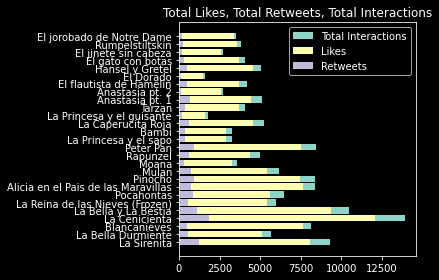

In [10]:

# Likes, Retweets e Interacciones totales.
plt.barh(df['Topic'], df['Total Interactions'].tolist(), label='Total Interactions')
plt.barh(df['Topic'], df['Total Likes'].tolist(), label='Likes')
plt.barh(df['Topic'], df['Total Retweets'].tolist(), label='Retweets')
plt.style.use('dark_background')
plt.title('Total Likes, Total Retweets, Total Interactions')
plt.tight_layout()
plt.legend()
plt.show()

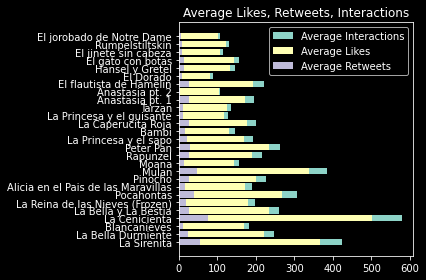

In [12]:

# Likes, retweets e interacciones promedio (dividido entre la cantidad de tweets de cada hilo).
plt.barh(df['Topic'], df['Average Interactions'].tolist(), label='Average Interactions')
plt.barh(df['Topic'], df['Average Likes'].tolist(), label='Average Likes')
plt.barh(df['Topic'], df['Average Retweets'].tolist(), label='Average Retweets')
plt.style.use('dark_background')
plt.title('Average Likes, Retweets, Interactions')
plt.tight_layout()
plt.legend()
plt.show()

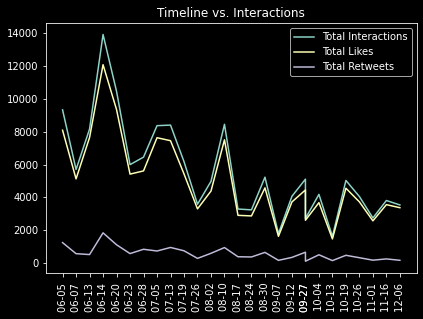

In [13]:

# línea de tiempo en la que se ven las interacciones de cada hilo según fueron publicados.
created_at = []
for date in (df['created at:']):
    date = date[5:11]
    created_at.append(date)

plt.plot(created_at, df['Total Interactions'], label='Total Interactions')
plt.plot(created_at, df['Total Likes'], label='Total Likes')
plt.plot(created_at, df['Total Retweets'], label='Total Retweets')
plt.style.use('dark_background')
plt.tight_layout()
plt.xticks(created_at, rotation=90)
plt.title('Timeline vs. Interactions')
plt.legend()
plt.show()

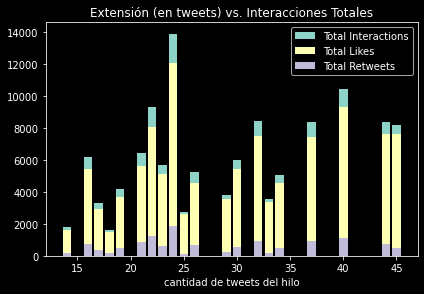

In [15]:

# Interacciones totales tomando en cuenta la extensión en tweets de cada hilo.
plt.bar(df['lenght'], df['Total Interactions'], label='Total Interactions')
plt.bar(df['lenght'], df['Total Likes'], label='Total Likes')
plt.bar(df['lenght'], df['Total Retweets'], label='Total Retweets')
plt.style.use('dark_background')
plt.title('Extensión (en tweets) vs. Interacciones Totales')
plt.legend()
plt.tight_layout()
plt.xlabel('cantidad de tweets del hilo')
plt.show()

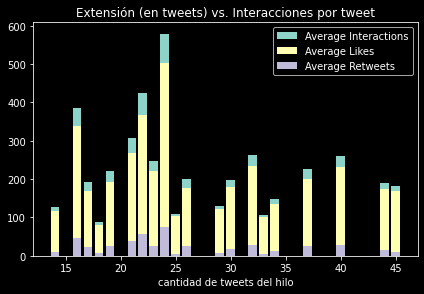

In [16]:

# Promedio de interacciones según la extensión de cada hilo.
plt.bar(df['lenght'], df['Average Interactions'], label='Average Interactions')
plt.bar(df['lenght'], df['Average Likes'], label='Average Likes')
plt.bar(df['lenght'], df['Average Retweets'], label='Average Retweets')
plt.style.use('dark_background')
plt.title('Extensión (en tweets) vs. Interacciones por tweet')
plt.legend()
plt.tight_layout()
plt.xlabel('cantidad de tweets del hilo')
plt.show()

 ## Comparativa de los hilos que tuvieron más de 8000 interacciiones

 Filtremos la base de datos para obtener los hilos que alcanzaron más de ocho mil interacciones:

In [18]:
df['Hit'] = df['Total Interactions'] > 8000
df
# la columna 'Hit' reporta el valor True para los hilos que cumplen la condición.

,Topic,created at:,lenght,Total Likes,Average Likes,Total Retweets,Average Retweets,Total Interactions,Average Interactions,Hit
0,La Sirenita,2020-06-05 23:36:54,22,8089,367,1244,56,9333,424,True
1,La Bella Durmiente,2020-06-07 21:36:01,23,5127,222,572,24,5699,247,False
2,Blancanieves,2020-06-13 00:09:45,45,7643,169,517,11,8160,181,True
3,La Cenicienta,2020-06-14 21:46:16,24,12081,503,1839,76,13920,580,True
4,La Bella y La Bestia,2020-06-20 19:47:36,40,9348,233,1113,27,10461,261,True
5,La Reina de las Nieves (Frozen),2020-06-23 03:38:29,30,5416,180,577,19,5993,199,False
6,Pocahontas,2020-06-28 03:52:23,21,5612,267,839,39,6451,307,False
7,Alicia en el Pais de las Maravillas,2020-07-05 20:43:50,44,7633,173,734,16,8367,190,True
8,Pinocho,2020-07-13 02:54:40,37,7452,201,950,25,8402,227,True
9,Mulan,2020-07-19 04:36:49,16,5430,339,747,46,6177,386,False


 Cargamos la data específica de cada hilo. Como vemos, estos archivos contienen la siguiente info de cada tweet del hilo:
* ID.
* Texto.
* Cantidad de Likes.
* Cantidad de Retweets.
* Cantidad de Interacciones.
 
A efectos comparativos, el ID y el texto de cada tweet es irrelevante, por lo que nos centraremos en las interacciones.

In [20]:
alicia = pd.read_csv('Alicia en el Pais de las Maravillas.csv')
blancanieves = pd.read_csv('Blancanieves.csv')
cenicienta = pd.read_csv('La Cenicienta.csv')
bella_bestia = pd.read_csv('La Bella y La Bestia.csv')
sirenita = pd.read_csv('La Sirenita.csv')
pinocho = pd.read_csv('Pinocho.csv')
peter_pan = pd.read_csv('Peter Pan.csv')

alicia.head()

,Tweet ID,Text,Likes,Retweets,Total Interactions
0,1279878679984734208,Se me callan porque si quieren saber de lugare...,1474,426,1900
1,1279878735613870092,Esta historia fue publicada en el año 1865 por...,181,10,191
2,1279878745978011649,La adaptación de Disney es casi exactikmente i...,129,9,138
3,1279878754370818048,Ajá bueno como dije hace dos tweets Charles Lu...,140,8,148
4,1279878764869095425,"Y digo de adultos porque al parecer el, “amaba...",163,13,176


 Si revisamos la info de cada archivo, observamos la cantidad de entradas (entries), que corresponde a la cantidad de tweets del hilo, es decir a la extensión.

In [21]:
# Por ejemplo, vemos que:
alicia.info() #44 tweets
blancanieves.info() #45 tweets
cenicienta.info() #24 tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tweet ID            44 non-null     int64 
 1   Text                44 non-null     object
 2   Likes               44 non-null     int64 
 3   Retweets            44 non-null     int64 
 4   Total Interactions  44 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tweet ID            45 non-null     int64 
 1   Text                45 non-null     object
 2   Likes               45 non-null     int64 
 3   Retweets            45 non-null     int64 
 4   Total Interactions  45 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.fram

Pasemos a los gráficos comparativos:

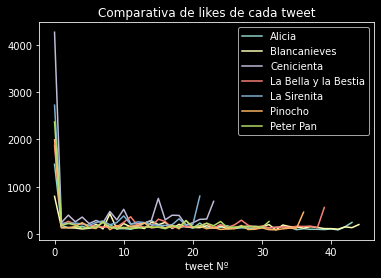

In [22]:
plt.plot(alicia['Likes'], label='Alicia')
plt.plot(blancanieves['Likes'], label='Blancanieves')
plt.plot(cenicienta['Likes'], label='Cenicienta')
plt.plot(bella_bestia['Likes'], label='La Bella y la Bestia')
plt.plot(sirenita['Likes'], label='La Sirenita')
plt.plot(pinocho['Likes'], label='Pinocho')
plt.plot(peter_pan['Likes'], label='Peter Pan')
plt.style.use('dark_background')
plt.xlabel('tweet Nº')
plt.title('Comparativa de likes de cada tweet')
plt.legend()
plt.show()

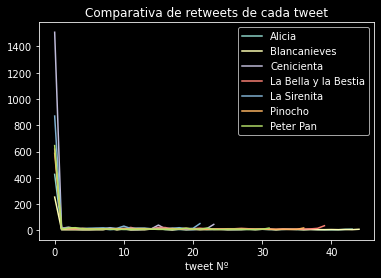

In [23]:
 plt.plot(alicia['Retweets'], label='Alicia')
plt.plot(blancanieves['Retweets'], label='Blancanieves')
plt.plot(cenicienta['Retweets'], label='Cenicienta')
plt.plot(bella_bestia['Retweets'], label='La Bella y la Bestia')
plt.plot(sirenita['Retweets'], label='La Sirenita')
plt.plot(pinocho['Retweets'], label='Pinocho')
plt.plot(peter_pan['Retweets'], label='Peter Pan')
plt.style.use('dark_background')
plt.xlabel('tweet Nº')
plt.title('Comparativa de retweets de cada tweet')
plt.legend()
plt.show()

 No debe sorprender que la cantidad de interacciones descienda drásticamente luego del primer tweet de cada hilo, especialmente para el caso de los retweets.
 
Generalmente el primer tweet de un hilo es el que recibirá -por mucho- la mayor cantidad de interacciones.
 
Veamos en los siguientes gráficos la diferencia en la cantidad de interacciones totales, likes y retweets entre el primero y el resto de los tweets del hilo de La Cenicienta.

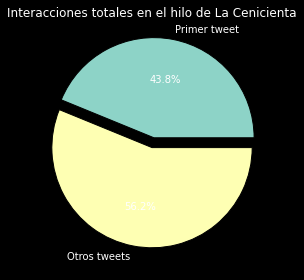

In [24]:
# separamos los tweets en dos variables distintas:
first_tweet = cenicienta['Total Interactions'].tolist()[0]
other_tweets = cenicienta['Total Interactions'].tolist()[1:-1]

# other_tweets es una lista de tweets, debemos sumar el total de interacciones de éstos.
other_tweets_added_interactions = 0
for tweet in other_tweets:
    other_tweets_added_interactions += tweet

# preparamos el gráfico de torta con las variables:
slices = [first_tweet, other_tweets_added_interactions]
labels = ['Primer tweet', 'Otros tweets']
explode = [0.1, 0]

plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Interacciones totales en el hilo de La Cenicienta')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

 Repitamos la operación anterior, ahora en dos gráficos separados: uno para likes y uno para retweets.

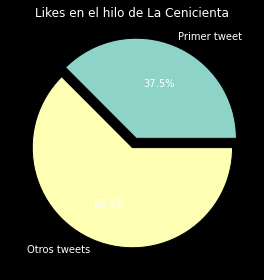

In [25]:
# Pie chart de Likes:
# separamos los tweets en dos variables distintas:
first_tweet = cenicienta['Likes'].tolist()[0]
other_tweets = cenicienta['Likes'].tolist()[1:-1]

other_tweets_added_likes = 0
for tweet in other_tweets:
    other_tweets_added_likes += tweet

# preparamos el gráfico de torta con las variables:
slices = [first_tweet, other_tweets_added_likes]
labels = ['Primer tweet', 'Otros tweets']
explode = [0.1, 0]

plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Likes en el hilo de La Cenicienta')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

Más de un tercio de los likes de todo el hilo provienen del tweet inicial.
 
En el caso de los retweets la diferencia es todavía más notoria.

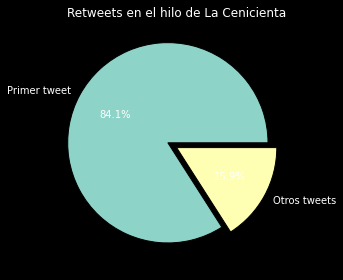

In [26]:
# Pie chart de Retweets:
first_tweet = cenicienta['Retweets'].tolist()[0]
other_tweets = cenicienta['Retweets'].tolist()[1:-1]

other_tweets_added_retweets = 0
for tweet in other_tweets:
    other_tweets_added_retweets += tweet

# preparamos el gráfico de torta con las variables:
slices = [first_tweet, other_tweets_added_retweets]
labels = ['Primer tweet', 'Otros tweets']
explode = [0.1, 0]

plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Retweets en el hilo de La Cenicienta')
plt.style.use('dark_background')
plt.tight_layout()
plt.show()

 Este trabajo no tiene un fin específico, y en consecuencia no ofrezco acá ningún tipo de conclusión sobre la data analizada. Este notebook no es más que un ejercicio práctico con data real recabada por mí.
 
Tanto este notebook como los archivos csv recopilados están a disposición en el siguiente repo de github:
https://github.com/dan-almenar/Data-Analisis-Twitter-Threads-ES-